In [1]:
import pandas as pd
import sqlite3 as lite
import matplotlib.pyplot as plt
%matplotlib inline

print('Creating connection')
con = lite.connect('imdb_movies.db')
cur = con.cursor()

Creating connection


# OVERVIEW

En este trabajo veremos las relaciones que existen entre ratings de peliculas, la cantidad de peliculas en un año, y ejemplos de actores y como estos se relacionan con lo antes mencionado

# Ratings de Peliculas por generos

Primero podemos ver varios generos de peliculas y el rating promedio para cada uno de ellos

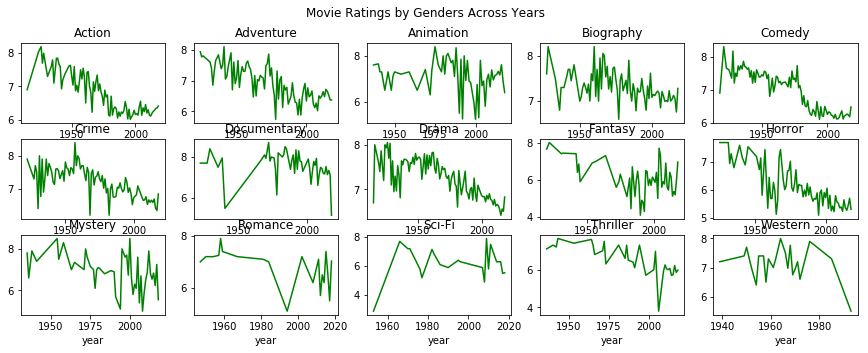

In [2]:
query = 'SELECT cast(`year` as int) `year`' \
        '      , genres' \
        '      , avg(average_rating) `average_rating`' \
        ' FROM vw_movie_genres_ratings' \
        ' GROUP BY `year`,genres'
ratings_by_genre = pd.read_sql(sql=query, con=con)
group_ratings_by_genre = ratings_by_genre.groupby(['genres'])

fig, axes = plt.subplots(3, 5, figsize=(15, 5))
for (group, data), ax in zip(group_ratings_by_genre , axes.flatten()):
    data.plot(x='year', y='average_rating', kind='line', ax=ax, title=group,color='green')
    ax.get_legend().remove()

plt.suptitle("Movie Ratings by Genders Across Years")
plt.show()

<img src="./Plots/01 - Movie Ratings_Genre_Year.png" width="1920" height="1080"/>

# Cantidad de Votos por Generos

Podemos comparar esto contra la cantidad de votos para cada genero

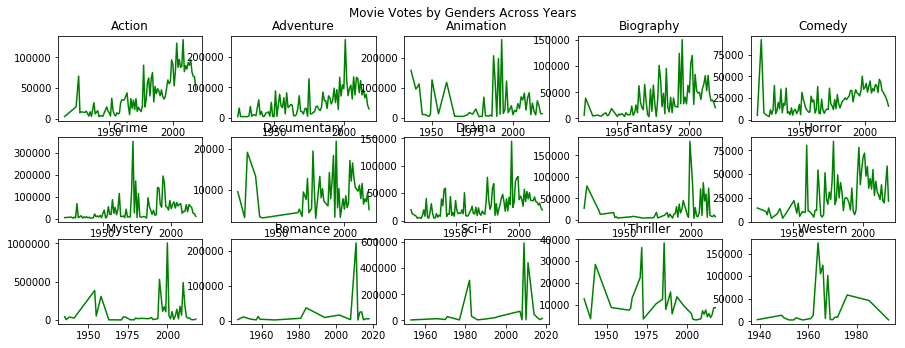

In [3]:
query = 'SELECT cast(`year` as int) `year`' \
        '      , genres' \
        '      , avg(num_votes) `num_votes`' \
        ' FROM vw_movie_genres_ratings' \
        ' GROUP BY `year`,genres'
votes_by_genre = pd.read_sql(sql=query, con=con)
group_votes_by_genre = votes_by_genre.groupby(['genres'])

fig, axes = plt.subplots(3, 5, figsize=(15, 5))
for (group, data), ax in zip(group_votes_by_genre, axes.flatten()):
        data.plot(x='year', y='num_votes', kind='line', ax=ax, title=group, color='green')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Movie Votes by Genders Across Years")
plt.show()

<img src="./Plots/02 - Votes_Genres_Year.png">

# Numero de peliculas por Genero

A eso tambien podemos sumar el numero de peliculas para cada genero

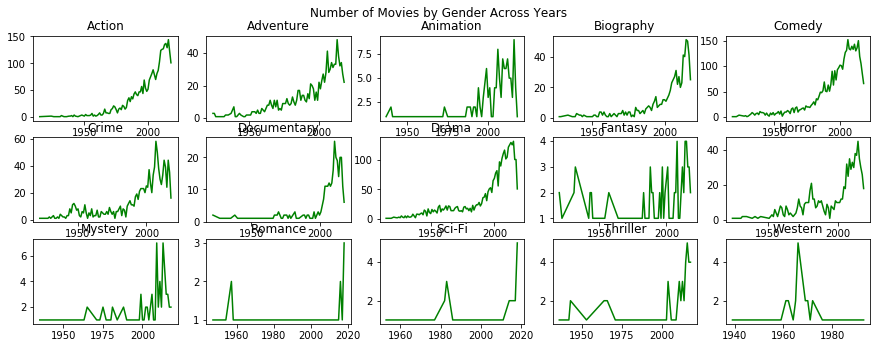

In [4]:
query = 'SELECT cast(`year` as int) `year`' \
        '       , genres' \
        '       , count(title_id) `num_titles`' \
        ' FROM vw_movie_genres_ratings' \
        ' GROUP BY `year`,genres'
num_movies_by_genre = pd.read_sql(sql=query, con=con)
group_movies_by_genre = num_movies_by_genre.groupby(['genres'])

fig, axes = plt.subplots(3, 5, figsize=(15, 5))
for (group, data), ax in zip(group_movies_by_genre, axes.flatten()):
        #data.plot(x='year', y='num_titles', kind='scatter', ax=ax, title=group, color='green')
        data.plot(x='year', y='num_titles', kind='line', ax=ax, title=group, color='green')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Number of Movies by Gender Across Years")
plt.show()

<img src="./Plots/03 - Movie Number_Genres_Year.png">

# Ejemplos

Se tomaron en cuenta 4 actores para confirmar los conteos de ratings, votos y cantidad de peliculas 

# Dwayne Johnson

## Tomamos en cuenta los ratings para cada pelicula

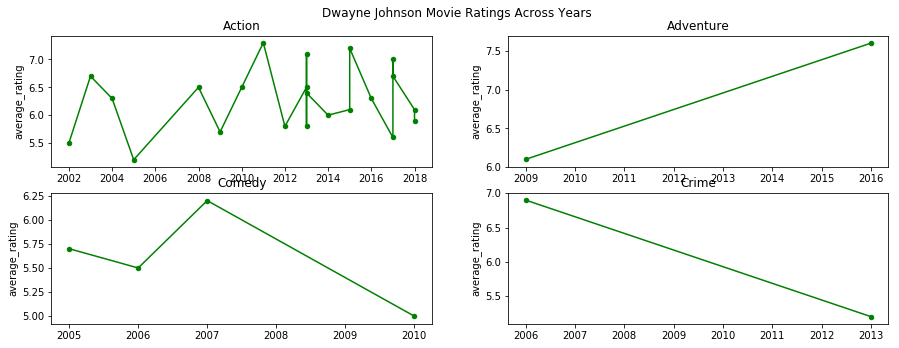

In [5]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.average_rating' \
        '     , mgr.num_votes' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0425005" AND mp.category = "actor"' \
        ' ORDER BY `year`'
dwayne_movies_ratings = pd.read_sql(sql=query, con=con)
group_dwayne_by_genre = dwayne_movies_ratings.groupby(['genres'])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for (group, data), ax in zip(group_dwayne_by_genre, axes.flatten()):
        data.plot(x='year', y='average_rating', kind='scatter', ax=ax, title=group, color='green')
        data.plot(x='year', y='average_rating', kind='line', ax=ax, title=group, color='green')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Dwayne Johnson Movie Ratings Across Years")
plt.show()

<img src="./Plots/04 - DJ_Ratings_Years.png">

# Dwayne Johnson

## Tomamos en la cuenta la cantidad de votos para cada pelicula

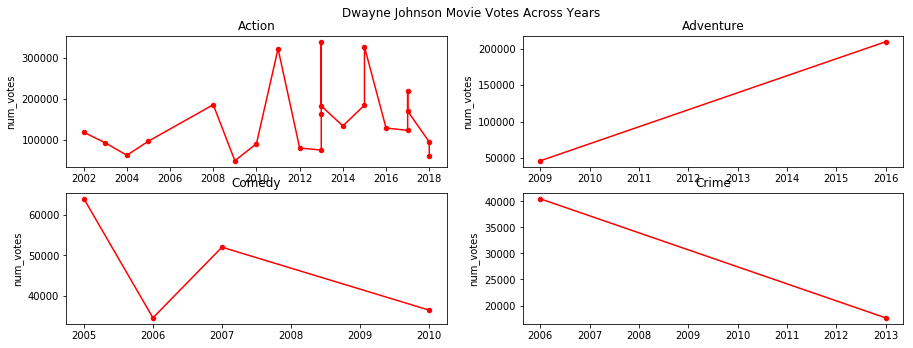

In [6]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.num_votes' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0425005" AND mp.category = "actor"' \
        ' ORDER BY `year`'
dwayne_movies_votes = pd.read_sql(sql=query, con=con)
group_dwayne_by_genre = dwayne_movies_votes.groupby(['genres'])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for (group, data), ax in zip(group_dwayne_by_genre, axes.flatten()):
        data.plot(x='year', y='num_votes', kind='scatter', ax=ax, title=group, color='red')
        data.plot(x='year', y='num_votes', kind='line', ax=ax, title=group, color='red')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Dwayne Johnson Movie Votes Across Years")
plt.show()

<img src="./Plots/05 - DJ_Votes_Years.png">

# Johnny Depp

## Tomamos en cuenta los ratings para cada pelicula

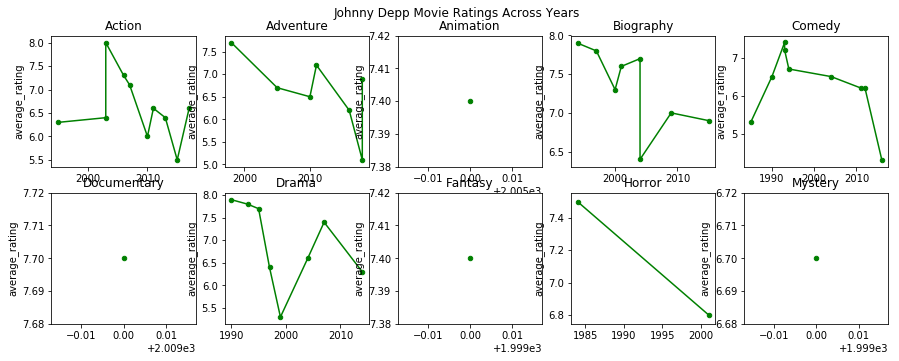

In [7]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.average_rating' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0000136" AND mp.category = "actor"' \
        ' ORDER BY `year`'
depp_movies_ratings = pd.read_sql(sql=query, con=con)
group_depp_by_genre = depp_movies_ratings.groupby(['genres'])

fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for (group, data), ax in zip(group_depp_by_genre, axes.flatten()):
        data.plot(x='year', y='average_rating', kind='scatter', ax=ax, title=group, color='green')
        data.plot(x='year', y='average_rating', kind='line', ax=ax, title=group, color='green')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Johnny Depp Movie Ratings Across Years")
plt.show()

<img src="./Plots/06 - JD_Ratings_Years.png">

# Johnny Depp

## Tomamos en la cuenta la cantidad de votos para cada pelicula

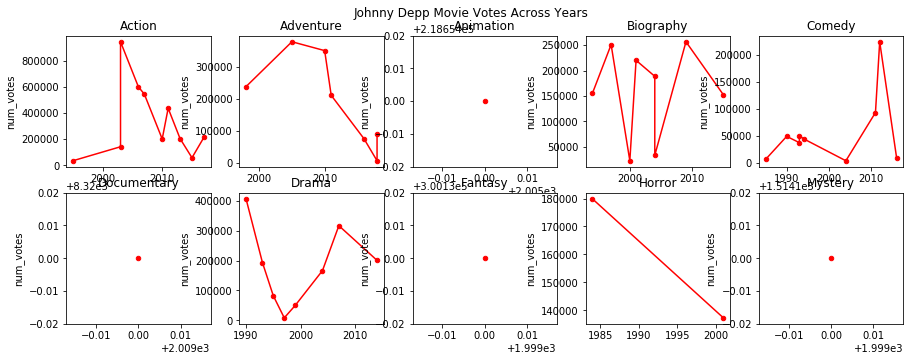

In [8]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.num_votes' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0000136" AND mp.category = "actor"' \
        ' ORDER BY `year`'
depp_movies_votes = pd.read_sql(sql=query, con=con)
group_depp_by_genre = depp_movies_votes.groupby(['genres'])

fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for (group, data), ax in zip(group_depp_by_genre, axes.flatten()):
        data.plot(x='year', y='num_votes', kind='scatter', ax=ax, title=group, color='red')
        data.plot(x='year', y='num_votes', kind='line', ax=ax, title=group, color='red')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Johnny Depp Movie Votes Across Years")
plt.show()

<img src="./Plots/07 - JD_Votes_Years.png">

# Robert De Niro

## Tomamos en cuenta los ratings para cada pelicula

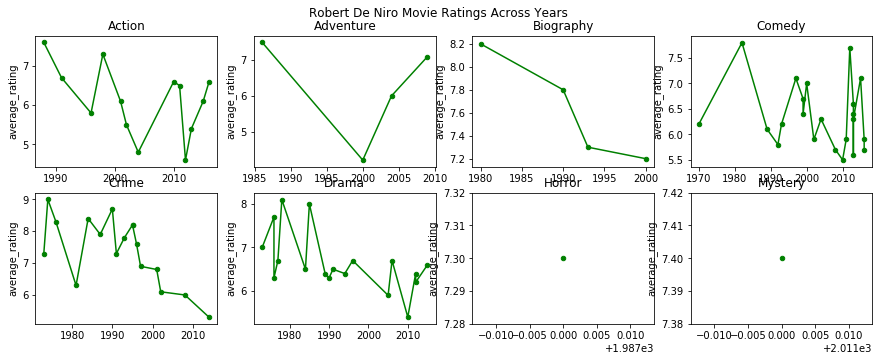

In [9]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.average_rating' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0000134" AND mp.category = "actor"' \
        ' ORDER BY `year`'
deniro_movies_ratings = pd.read_sql(sql=query, con=con)
group_deniro_by_genre = deniro_movies_ratings.groupby(['genres'])

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
for (group, data), ax in zip(group_deniro_by_genre, axes.flatten()):
        data.plot(x='year', y='average_rating', kind='scatter', ax=ax, title=group, color='green')
        data.plot(x='year', y='average_rating', kind='line', ax=ax, title=group, color='green')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Robert De Niro Movie Ratings Across Years ")
plt.show()

<img src="./Plots/08 - DN_Ratings_Years.png">

# Robert De Niro

## Tomamos en la cuenta la cantidad de votos para cada pelicula

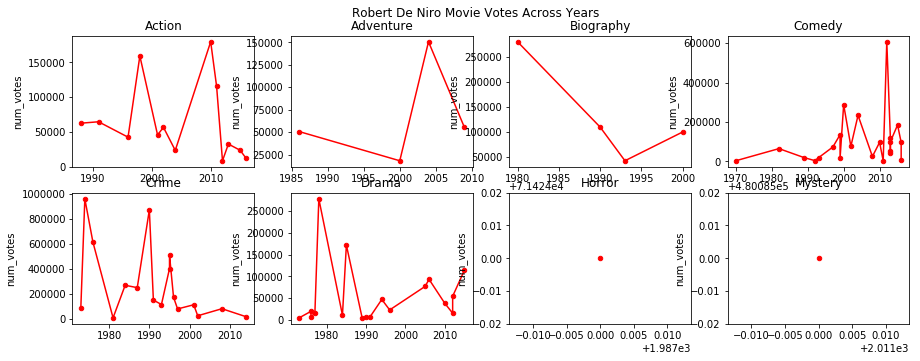

In [10]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.num_votes' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0000134" AND mp.category = "actor"' \
        ' ORDER BY `year`'
deniro_movies_votes = pd.read_sql(sql=query, con=con)
group_deniro_by_genre = deniro_movies_votes.groupby(['genres'])

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
for (group, data), ax in zip(group_deniro_by_genre, axes.flatten()):
        data.plot(x='year', y='num_votes', kind='scatter', ax=ax, title=group, color='red')
        data.plot(x='year', y='num_votes', kind='line', ax=ax, title=group, color='red')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Robert De Niro Movie Votes Across Years ")
plt.show()

<img src="./Plots/09 - DN_Votes_Years.png">

# Nicholas Cage

## Tomamos en cuenta los ratings para cada pelicula

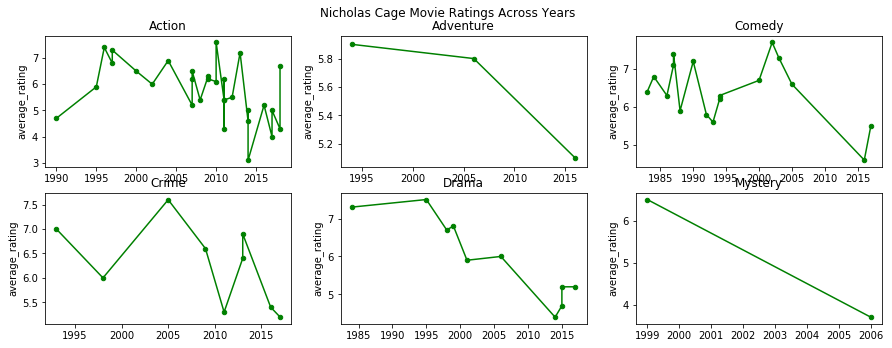

In [11]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.average_rating' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0000115" AND mp.category = "actor"' \
        ' ORDER BY `year`'
cage_movies_ratings = pd.read_sql(sql=query, con=con)
group_cage_by_genre = cage_movies_ratings.groupby(['genres'])

fig, axes = plt.subplots(2, 3, figsize=(15, 5))
for (group, data), ax in zip(group_cage_by_genre, axes.flatten()):
        data.plot(x='year', y='average_rating', kind='scatter', ax=ax, title=group, color='green')
        data.plot(x='year', y='average_rating', kind='line', ax=ax, title=group, color='green')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Nicholas Cage Movie Ratings Across Years ")
plt.show()

<img src="./Plots/10 - NC_Ratings_Years.png">

# Nicholas Cage

## Tomamos en la cuenta la cantidad de votos para cada pelicula

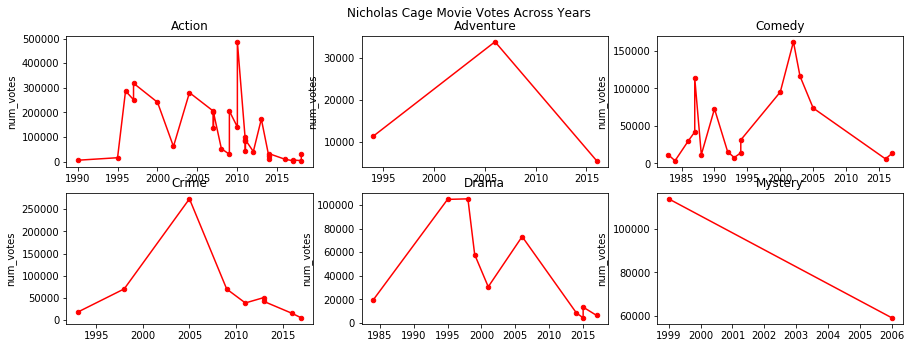

In [12]:
query = 'SELECT mgr.title_id' \
        '     , cast(mgr.`year` as int) `year`' \
        '     , mgr.num_votes' \
        '     , mgr.genres' \
        ' FROM vw_movie_genres_ratings mgr' \
        '        JOIN tbl_movie_principals mp' \
        '                ON mgr.title_id = mp.title_id' \
        ' WHERE mp.person_id = "nm0000115" AND mp.category = "actor"' \
        ' ORDER BY `year`'
cage_movies_votes = pd.read_sql(sql=query, con=con)
group_cage_by_genre = cage_movies_votes.groupby(['genres'])

fig, axes = plt.subplots(2, 3, figsize=(15, 5))
for (group, data), ax in zip(group_cage_by_genre, axes.flatten()):
        data.plot(x='year', y='num_votes', kind='scatter', ax=ax, title=group, color='red')
        data.plot(x='year', y='num_votes', kind='line', ax=ax, title=group, color='red')
        ax.get_legend().remove()
        ax.set_xlabel('')

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
plt.suptitle("Nicholas Cage Movie Votes Across Years ")
plt.show()

<img src="./Plots/11 - NC_Votes_Years.png">

# Gracias